In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
%matplotlib inline

In [13]:
snapfilename = '/project/projectdirs/desi/mocks/bgs/MXXL/snapshot/galaxy_catalogue_snapshot_55.hdf5'
f = h5py.File(snapfilename)

In [5]:
vel = f['Data/vel'][...]

In [6]:
pos = f['Data/pos'][...]

In [14]:
r_abs_mag = f['Data/abs_mag'][...]

In [15]:
f.close()

In [145]:
n_points = len(pos)

In [167]:
def get_mean_velocity(center_x, center_y, center_z):
    r = np.sqrt((pos[:,0]-center_x)**2 + (pos[:,1]-center_y)**2 + (pos[:,2]-center_z)**2)
    ii = r < 800.0
    vel_inside = vel[ii,:]
    r_center = r[ii] 
    r_abs_inside = r_abs_mag[ii]

    r_bins = np.arange(50,700,50)
    mean_vel_x = r_bins.copy()
    mean_vel_y = r_bins.copy()
    mean_vel_z = r_bins.copy()
    n_inside = r_bins.copy()

    for i in range(len(r_bins)):
        ii = (r_center < r_bins[i]) & (r_abs_inside < -20.0)
        n_inside[i] = np.count_nonzero(ii)
        mean_vel_x[i] = np.mean(vel_inside[ii,0])
        mean_vel_y[i] = np.mean(vel_inside[ii,1])
        mean_vel_z[i] = np.mean(vel_inside[ii,2])
    print('done with bin {}'.format(r_bins[i]))
    mean_vel =np.sqrt(mean_vel_x**2 + mean_vel_y**2 + mean_vel_z**2)

    return {'radius':r_bins, 'velocity':mean_vel}

In [168]:
def get_spheres(n_spheres=10):
    spheres = {}
    for i in range(n_spheres):
        center_x = center_y = center_z = 0.0
        while (center_x < 700) | (center_y < 700) | (center_z < 700):
            i_center = np.random.choice(np.arange(n_points//100))
            print(n_points, i_center)
            center_x = pos[i_center,0]
            center_y = pos[i_center,1]
            center_z = pos[i_center,2]
        print(i, center_x, center_y, center_z)
        spheres[i] = get_mean_velocity(center_x, center_y, center_z)
    return spheres

In [172]:
spheres = get_spheres(n_spheres=20)

729858655 4222412
0 1161.2 2574.85 2326.07
done with bin 650
729858655 6906759
1 2448.97 2385.0 1166.13
done with bin 650
729858655 5264195
2 2785.22 2463.32 1268.65
done with bin 650
729858655 1928097
3 2211.11 1564.08 892.766
done with bin 650
729858655 4336599
4 2506.9 1925.74 2796.89
done with bin 650
729858655 1313525
5 1328.32 774.41 2618.56
done with bin 650
729858655 794901
6 1406.1 1073.12 2192.61
done with bin 650
729858655 1319025
7 1691.03 2720.07 2657.78
done with bin 650
729858655 4717449
729858655 1511656
729858655 6078797
729858655 3328037
729858655 6778757
729858655 5896479
8 1519.48 1062.92 1951.23
done with bin 650
729858655 1092492
729858655 2050807
729858655 4231310
729858655 892935
729858655 3936781
9 2466.52 2067.49 1713.67
done with bin 650
729858655 1950212
10 2702.39 1374.68 2786.36
done with bin 650
729858655 6473454
11 2775.9 1578.78 932.68
done with bin 650
729858655 197213
729858655 1992176
729858655 2670401
729858655 5482300
12 1611.06 2877.21 881.737
don

In [179]:
n_bins = len(spheres[0]['radius'])
n_spheres = 20
mean_vel_sphere = np.ones(n_bins)
std_vel_sphere = np.ones(n_bins)

for i in range(n_bins):
    v = []
    for s in range(n_spheres):
        v.append(spheres[s]['velocity'][i])
    mean_vel_sphere[i] = np.mean(v)
    std_vel_sphere[i] = np.std(v)
print(n_bins)

13


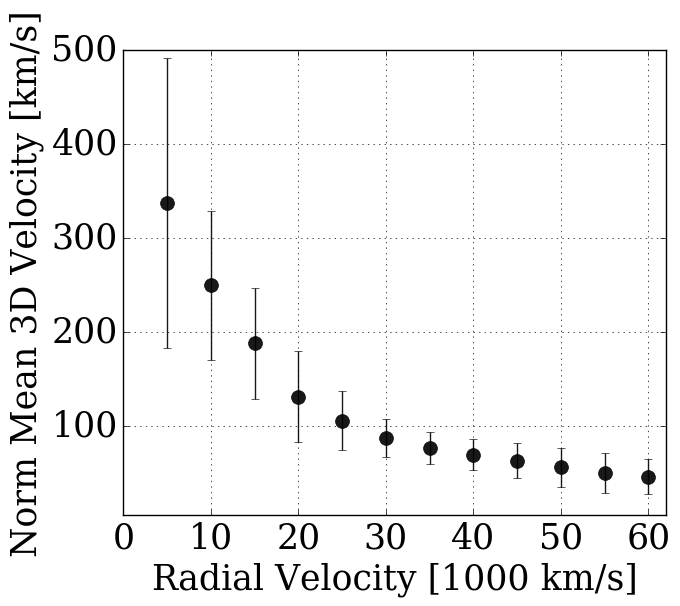

In [187]:
mean_vel =np.sqrt(mean_vel_x**2 + mean_vel_y**2 + mean_vel_z**2)
fig = plt.figure(1, figsize=(7,6))
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=25)


plt.errorbar(sphere['radius']/10, mean_vel_sphere, yerr=std_vel_sphere,
            fmt='o', markersize=10, color='black', alpha=0.9)

plt.ylim([5,500])
plt.xlim([0,62])
plt.grid()
plt.xlabel(r"Radial Velocity [1000 km/s]")
plt.ylabel(r"Norm Mean 3D Velocity [km/s]")
#plt.savefig('velocity_radius_sim.pdf', bbox_inches='tight')